In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from training.data.datasets import load_json_data
import seaborn as sns

/home/getzner/miniconda3/envs/tandic-training/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load data
with open('../../data/raw_data_annotated_with_chatgpt.json') as f:
    raw_data = json.load(f)

In [3]:
# example
raw_data[0]

{'text': {'text': 'Is there a case for a basic income guarantee – Part 5\nThis is Part 5 in the mini-series discussing the relative merits of the basic income guarantee proposal and the Job Guarantee proposal. It finishes this part of our discussion. Today, I consider how society establishes a fair transition environment to cope with climate change and the impacts of computerisation etc.',
  'article_id': 1520,
  'sentence_id': 0,
  'title': 'Is there a case for a basic income guarantee – Part 5'},
 'label': 'universal_basic_income',
 'label2': 'universal_basic_income',
 'spans': [],
 'article_id': 1520,
 'sentence_id': 0,
 'answer': '',
 'priority': None,
 'score': None,
 'title': 'Is there a case for a basic income guarantee – Part 5',
 'gpt_first_response_is_invalid': False,
 'gpt_second_response_is_invalid': False}

In [4]:
# create a dataframe from the data
df = pd.DataFrame(raw_data)
print(df.shape)
df.head()

(14369, 12)


,text,label,label2,spans,article_id,sentence_id,answer,priority,score,title,gpt_first_response_is_invalid,gpt_second_response_is_invalid
0,{'text': 'Is there a case for a basic income g...,universal_basic_income,universal_basic_income,[],1520,0,,None,None,Is there a case for a basic income guarantee –...,False,False
1,{'text': 'I outline a coherent adjustment fram...,universal_basic_income,universal_basic_income,[],1520,1,,None,None,Is there a case for a basic income guarantee –...,False,False
2,{'text': 'Adopting a basic income guarantee in...,universal_basic_income,universal_basic_income,[],1520,2,,None,None,Is there a case for a basic income guarantee –...,False,False
3,{'text': 'Just Transition Framework The Just T...,universal_basic_income,universal_basic_income,[],1520,3,,None,None,Is there a case for a basic income guarantee –...,False,False
4,{'text': '][Reference: (1996) ‘Sustainable dev...,universal_basic_income,universal_basic_income,[],1520,4,,None,None,Is there a case for a basic income guarantee –...,False,False


In [5]:
# count rows where "gpt_first_response_is_invalid" is True
df["gpt_first_response_is_invalid"].value_counts()

gpt_first_response_is_invalid
False    12532
True      1837
Name: count, dtype: int64

In [6]:
df["gpt_second_response_is_invalid"].value_counts()

gpt_second_response_is_invalid
False    13602
True       767
Name: count, dtype: int64

In [7]:
df["keep"] = df["gpt_second_response_is_invalid"] == False
df = df.drop(columns=["label"])
df.rename(columns={"label2": "label"}, inplace=True)

In [8]:
# mark keep as False where label is "unsure" or "irrelevant"
df["keep"] = df["keep"] & (df["label"] != "unsure") & (df["label"] != "irrelevant")

# Anlayze annotation results

In [9]:
# count samples per label
df.label.value_counts()

label
irrelevant                                        2616
unsure                                            1533
scope_4/avoided_emissions                         1379
ecosophy                                           965
smart_energy_grids                                 784
                                                  ... 
communication_and_outreach_activities                1
energy_efficiency_building_codes                     1
sustainable_construction                             1
decentralized_energy_supply                          1
smart_food_management/kitchen/fridges/freezers       1
Name: count, Length: 329, dtype: int64

In [10]:
# set the label to "bad annotation" where keep is False
df["label"] = df["label"].where(df["keep"], "bad annotation/irrelevant")

In [11]:
# count samples per label
df.label.value_counts()

label
bad annotation/irrelevant                         4916
scope_4/avoided_emissions                         1379
ecosophy                                           965
smart_energy_grids                                 784
city_planning                                      670
                                                  ... 
biking                                               1
3d_printed_apparel                                   1
teleworking                                          1
videoconferencing                                    1
smart_food_management/kitchen/fridges/freezers       1
Name: count, Length: 67, dtype: int64

<Axes: xlabel='count', ylabel='label'>

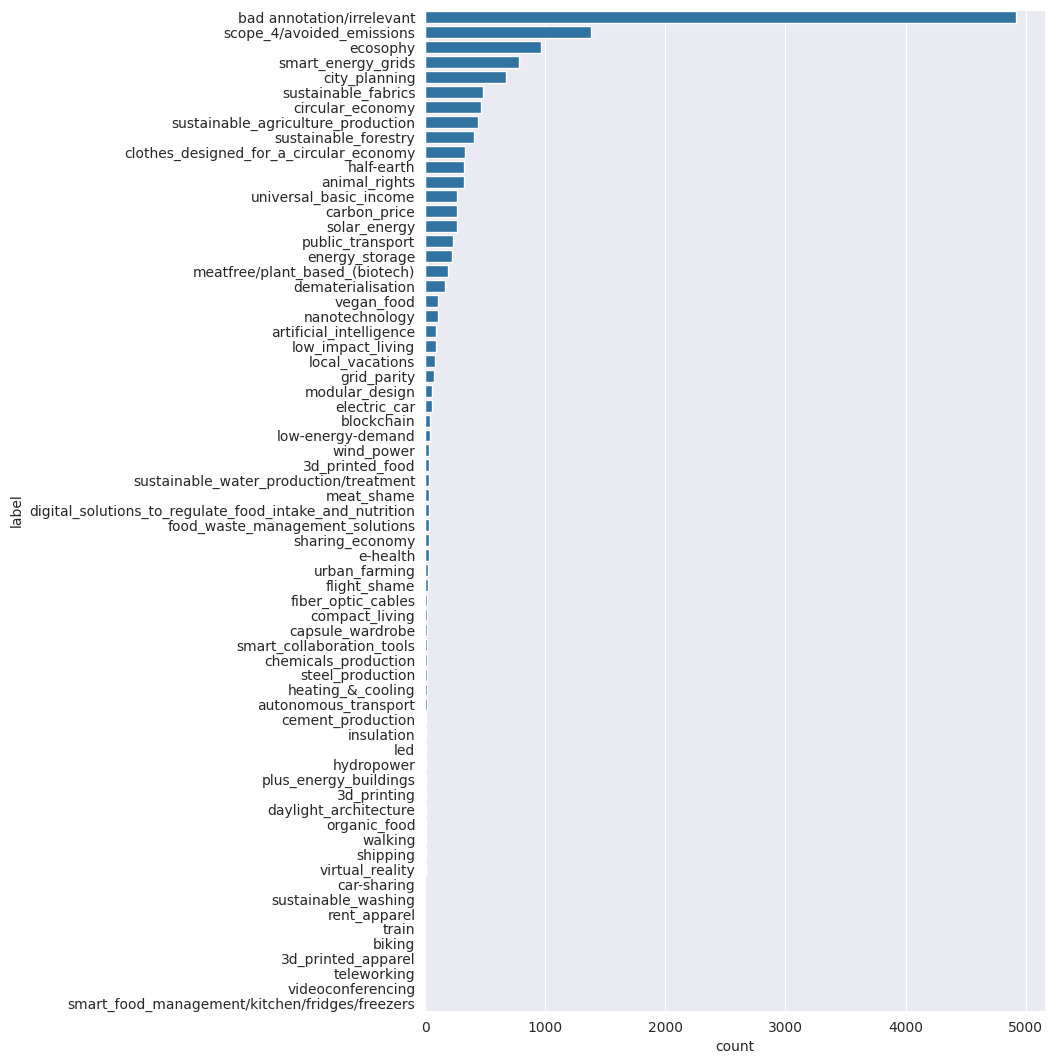

In [12]:
# plot counts
plt.figure(figsize=(8, 13))
sns.countplot(y="label", data=df, order = df.label.value_counts().index)

<Axes: xlabel='count', ylabel='category'>

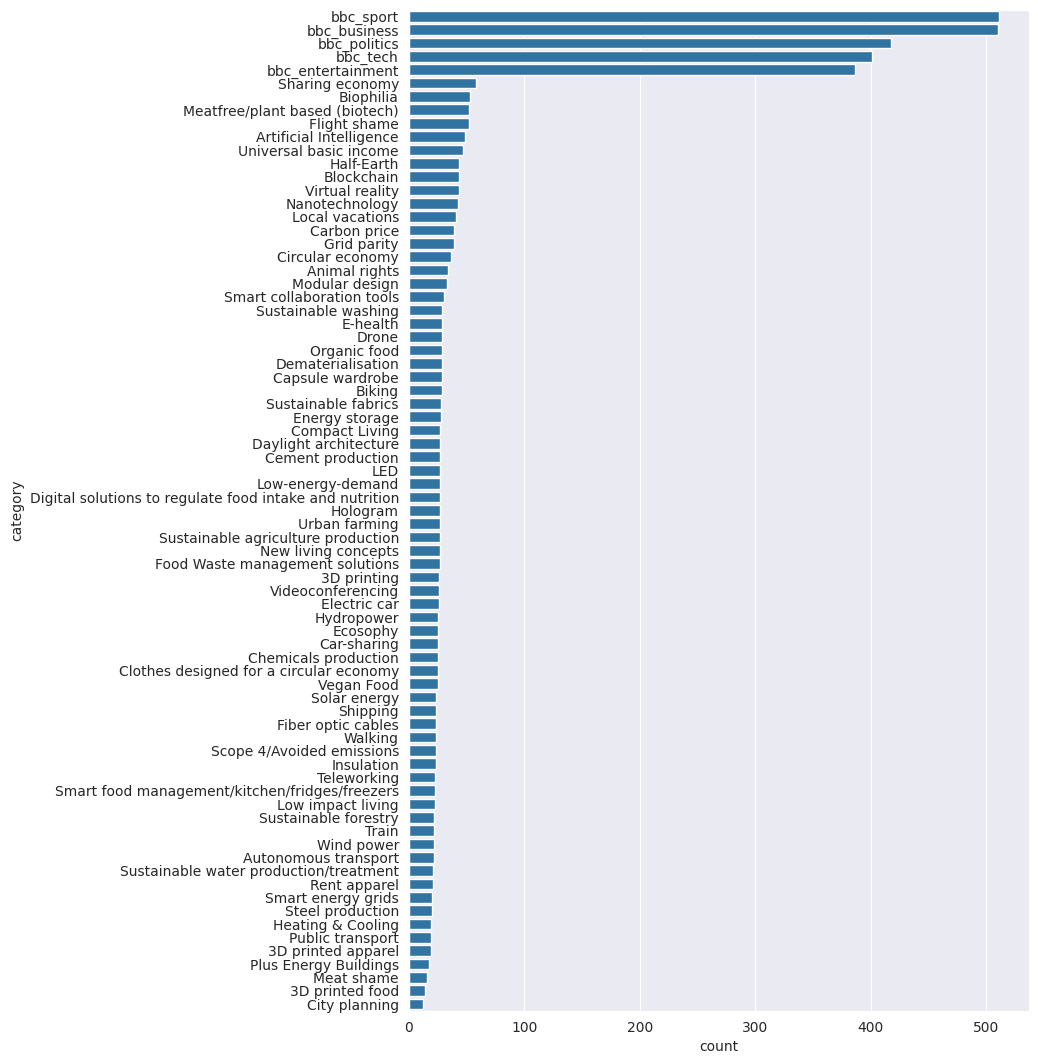

In [13]:
# load .jsonl file from data folder
plt.figure(figsize=(8, 13))
with open("../../data/raw_data.jsonl") as f:
    raw_data_jsonl = [json.loads(line) for line in f]
raw_data_jsonl_df = pd.DataFrame(raw_data_jsonl)
sns.countplot(y="category", data=raw_data_jsonl_df, order = raw_data_jsonl_df.category.value_counts().index)

# Save data

In [14]:
df = df.loc[df["keep"]]

In [15]:
# load old data
old_data = load_json_data("../../training/datasets")
old_data.head()

,text,label,spans,article_id,sentence_id
0,J Sol. Energy Eng. April 2018; 140(2): 021012....,fiber_optic_cables,[fiber-optic],424,8
1,Energy Eng. April 2018; 140(2): 021012. https:...,fiber_optic_cables,[fiber-optic],424,9
2,April 2018; 140(2): 021012. https://doi.org/10...,fiber_optic_cables,[fiber-optic],424,10
3,"The scope included the design, development, an...",fiber_optic_cables,[fiber-optic cables],424,11
4,The designed system is comprised of two subsys...,fiber_optic_cables,"[fiber-optic cables, fiber-optic cables]",424,12


In [16]:
df = df[old_data.columns]
df.text = df.text.apply(lambda x: x["text"])
df.head()

,text,label,spans,article_id,sentence_id
0,Is there a case for a basic income guarantee –...,universal_basic_income,[],1520,0
1,I outline a coherent adjustment framework to a...,universal_basic_income,[],1520,1
2,Adopting a basic income guarantee in this cont...,universal_basic_income,[],1520,2
3,Just Transition Framework\nThe Just Transition...,universal_basic_income,[],1520,3
4,][Reference: (1996) ‘Sustainable development: ...,universal_basic_income,[],1520,4


In [17]:
# make sure column names are the same
column_map = {
    # old -> new
    "3d_printed_clothes": "3d_printed_apparel",
    "car_sharing": "car-sharing",
    "e_health": "e-health",
    "smart_food_management_kitchen_fridges_freezers": "smart_food_management/kitchen/fridges/freezers",
}
old_data.label = old_data.label.apply(lambda x: column_map[x] if x in column_map else x)

In [18]:
# merge datasets
df = pd.concat([df, old_data], ignore_index=True)
print(df.shape)

(18869, 5)


In [19]:
# drop ay rows with duplicate texts
df = df.drop_duplicates(subset=["text"])
print(df.shape)

(18788, 5)


# Save data

In [20]:
# drop all rows where label has less than 10 samples
df = df.groupby("label").filter(lambda x: len(x) >= 10)

In [21]:
# save data as parquet
df.to_parquet("../../training/datasets/chat_gpt_annotated_data.parquet")
print(len(set(df.label)))

57
